In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../.')
import datasets

In [2]:
sample_size = 200
feature_dimension = 9
# Sample wise double descent for linear model only affected by input Dimension, even if some of input is disturbance (useless) term
used_feature = feature_dimension
noise_level = 0
bias = 0
y_dimension = 5
test_size = 0.5
# set a random seed (int) if you want to the datasets to be fixed
RAND_ST = None

X, y = datasets.linear_regression_with_gaussian(sample_size=sample_size, feautre_size=feature_dimension, used_feature=used_feature, noise_level=noise_level, bias=bias, y_dimension=y_dimension, random_state=RAND_ST)

# Sample-wise dd peak for Linear Regression only affected by input dimension, not used feature 
# weight = np.random.random((X.shape[1], y_dimension))
# y = X.dot(weight)

# X_noise = np.copy(X)

X = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False).fit_transform(X)

# for col in range(feature_dimension):
#     X[:, col] = X[:, col] ** 2
# X = np.column_stack((np.ones(sample_size), X))

weight = np.random.random((X.shape[1], y_dimension))
y = X.dot(weight)

Noiseless Data

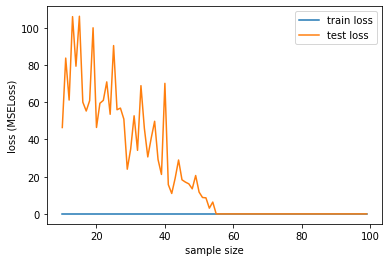

In [3]:
train_losses = []
test_losses = []

samples = [sample for sample in range(10, int(sample_size/2), 1)]

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LinearRegression().fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()

Noisy Data

In [4]:
X = X + np.random.normal(0, 0.1, (sample_size, X.shape[1]))
# X = X_noise + np.random.normal(0, 0.1, (sample_size, X_noise.shape[1]))
# X = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False).fit_transform(X)

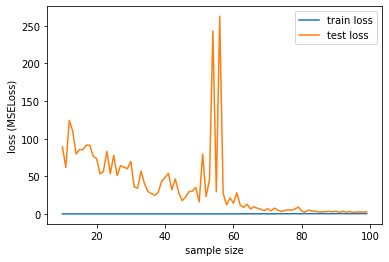

: 

In [5]:
train_losses = []
test_losses = []

samples = [sample for sample in range(10, int(sample_size/2), 1)]

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LinearRegression().fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()